# Currency

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os, fem
data_dir = '../../../../data/currency'

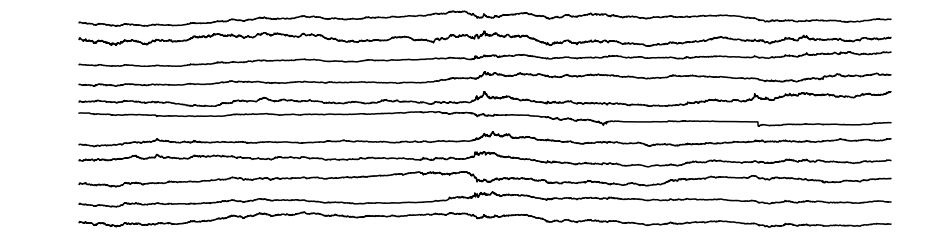

In [2]:
x = np.loadtxt(os.path.join(data_dir, 'currency_original.txt'), skiprows=1)[:,1:].T
fig, ax = plt.subplots(x.shape[0], 1, figsize=(16,4))
for i, xi in enumerate(x):
    ax[i].plot(xi, 'k-')
    ax[i].axis('off')

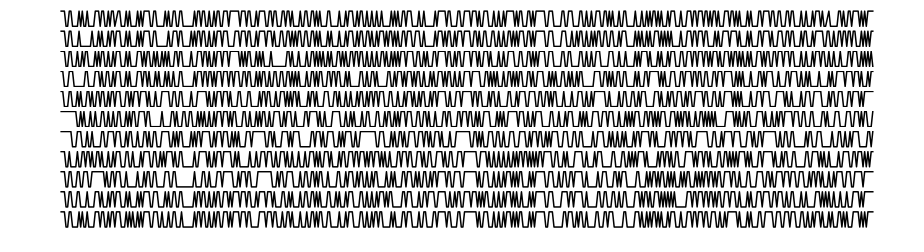

In [3]:
# dx_sign = np.array([xi > xi.mean() for xi in x]).astype(int)
dx_sign = np.sign(np.diff(x, axis=1)).astype(int)
dx_sign, cat_dx_sign = fem.discrete.fit.categorize(dx_sign)
fig, ax = plt.subplots(x.shape[0], 1, figsize=(16,4))
for i, dxi in enumerate(dx_sign):
    ax[i].plot(dxi[:500], 'k-')
    ax[i].axis('off')

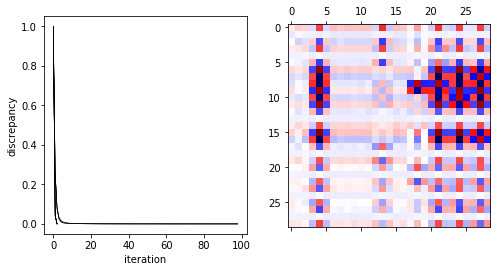

In [4]:
w, d = fem.discrete.fit.fit(dx_sign[:,:-1], dx_sign[:,1:], degs=[1], overfit=False)

fig, ax = plt.subplots(1, 2, figsize=(8,4))
for di in d:
    ax[0].plot((di - di.min()) / (di.max() - di.min()), 'k-', lw=0.5)
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('discrepancy')
ax[1].matshow(w[1], cmap='seismic')
plt.show()

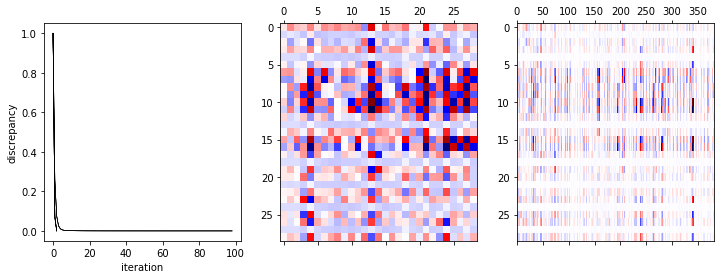

In [5]:
w, d = fem.discrete.fit.fit(dx_sign[:,:-1], dx_sign[:,1:], degs=[1, 2], overfit=False)

fig, ax = plt.subplots(1, 3, figsize=(12,4))
for di in d:
    ax[0].plot((di - di.min()) / (di.max() - di.min()), 'k-', lw=0.5)
ax[0].set_xlabel('iteration')
ax[0].set_ylabel('discrepancy')
ax[1].matshow(w[1], cmap='seismic', aspect='auto')
ax[2].matshow(w[2], cmap='seismic', aspect='auto')
plt.show()

In [6]:
def predict(w, x, cat_x):
    degs = np.sort(w.keys())
    w = np.hstack(w.values())
    x, idx = fem.discrete.fit.one_hot(x, degs=degs)
    x = x.toarray()
    m = np.cumsum([len(cat) for cat in cat_x[:-1]])
    p = np.split(w.dot(x), m, axis=0)
    x = np.array([pi.argmax(axis=0) for pi in p])
    i = np.arange(x.shape[1])
    p = np.array([pi[xi, i] for xi, pi in zip(x, p)])
    return x, p

# t0, tn, tw, dt = 0, dx_sign.shape[1], 20, 1
# t1, t2 = t0, t0 + tw
# while t2 < tn:
#     w, d = fem.discrete.fit.fit(dx_sign[:,t1:t2], dx_sign[:,t1+1:t2+1], degs=[1], overfit=True)
#     dx_sign_predict, p = predict(w, dx_sign[:,t2-1], cat_dx_sign)
#     print p
#     t1 += dt
#     t2 = t1 + tw

w, d = fem.discrete.fit.fit(dx_sign[:,:-1], dx_sign[:,1:], degs=[1], overfit=True)
dx_sign_predict, p = predict(w, dx_sign, cat_dx_sign)
print np.isclose(dx_sign[:,1:], dx_sign_predict[:,:-1]).mean()
w, d = fem.discrete.fit.fit(dx_sign[:,:-1], dx_sign[:,1:], degs=[1,2], overfit=True)
dx_sign_predict, p = predict(w, dx_sign, cat_dx_sign)
print np.isclose(dx_sign[:,1:], dx_sign_predict[:,:-1]).mean()

0.5245165882399462
0.5492111194590533
